I took a picture of a scene. Then, without moving the camera, I put a coffee cup in the scene and took a second picture. I loaded these images and converted both to 8-bit grayscale images. 

Then I took the absolute value of their difference. 

Finally, I took the binary threshold of the resulting image using a level that preserved most of the coffee mug but removed some of the noise and displayed the result.


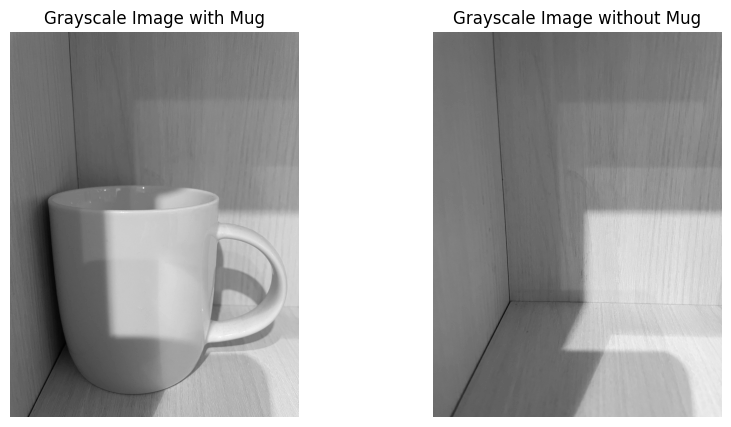

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the images
img_mug = cv2.imread('img_mug.jpeg')
img_no_mug = cv2.imread('img_no_mug.jpeg')

# Convert the images to 8-bit grayscale
img_mug_gray = cv2.cvtColor(img_mug, cv2.COLOR_BGR2GRAY)
img_no_mug_gray = cv2.cvtColor(img_no_mug, cv2.COLOR_BGR2GRAY)

# Display the grayscale images using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_mug_gray, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Grayscale Image with Mug')

axs[1].imshow(img_no_mug_gray, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Grayscale Image without Mug')

plt.show()


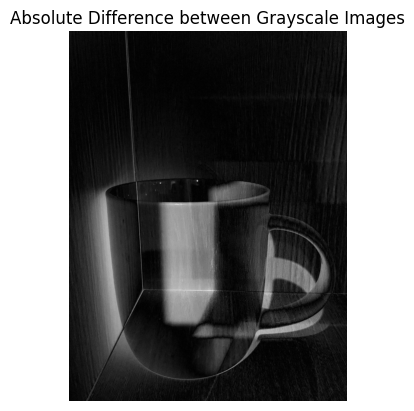

In [2]:
# Take the absolute value of the difference between the two grayscale images
difference = cv2.absdiff(img_mug_gray, img_no_mug_gray)

# Display the difference image
plt.imshow(difference, cmap='gray')
plt.axis('off')
plt.title('Absolute Difference between Grayscale Images')
plt.show()


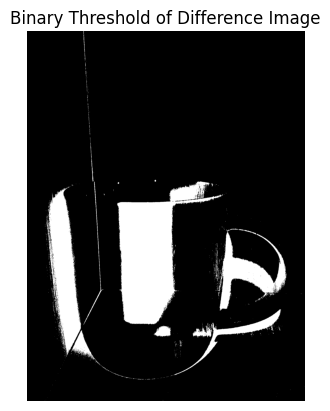

In [3]:
# Apply a binary threshold to the difference image
# The threshold value wa determined by trial and error to preserve the mug while removing noise
threshold_value = 50  
_, binary_threshold = cv2.threshold(difference, threshold_value, 255, cv2.THRESH_BINARY)

# Display the binary threshold image
plt.imshow(binary_threshold, cmap='gray')
plt.axis('off')
plt.title('Binary Threshold of Difference Image')
plt.show()


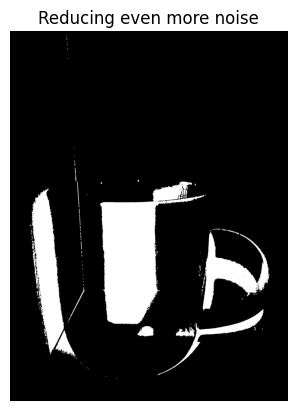

In [4]:
import numpy as np
# Create a kernel for morphological operations
kernel = np.ones((3,3), np.uint8)

# Apply morphological opening to the binary threshold image to remove noise
binary_threshold_opened = cv2.morphologyEx(binary_threshold, cv2.MORPH_OPEN, kernel)

# Display the result
plt.imshow(binary_threshold_opened, cmap='gray')
plt.axis('off')  # Hide the axes
plt.title('Reducing even more noise')
plt.show()
